In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [3]:
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check the target ###

In [5]:
import seaborn as sns

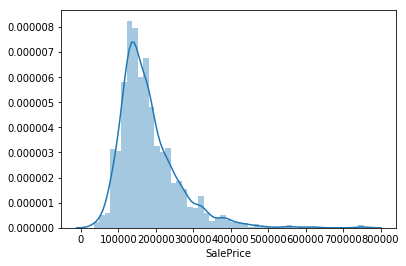

In [6]:
sns.distplot(train.SalePrice)

In [7]:
print('skew:',train.SalePrice.skew())
print('kurtosis:', train.SalePrice.kurtosis())

skew: 1.88287575977
kurtosis: 6.53628186006


In [8]:
logSalePrice = np.log(train.SalePrice)

In [9]:
pd.options.display.max_columns =100

### Classification of the features ###

In [10]:
drop=['id']

#Put MoSold and YrSold together?
dates=['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold','YrSold']

cat_card=['MSSubClass','MasVnrType','LotShape','LandContour','LotConfig','LandSlope',
         'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
         'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType',
         'GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']

cat_ord=['OverallQual','OverallCond','MSZoning','ExterQual','ExterCond','BsmtQual','BsmtCond',
        'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical',
        'KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond','PoolQC']

num_cont=['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
          '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 'GarageArea','WoodDeckSF',
          'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

num_dis=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
         'TotRmsAbvGrd','Fireplaces','GarageCars']

dummy_var=['Street','Alley','Utilities','CentralAir']


### Deal With Dates ###

In [11]:
from datetime import datetime

In [12]:
for el in dates[:3]:
    train[el]=pd.to_datetime(train[el])
    test[el]=pd.to_datetime(test[el])

In [13]:
train['DateSold'] = train.apply(lambda row: datetime(row['YrSold'], row['MoSold'],1), axis=1)
test['DateSold'] = test.apply(lambda row: datetime(row['YrSold'], row['MoSold'],1), axis=1)

In [14]:
train.drop(dates[3:],inplace=True, axis=1)
test.drop(dates[3:],inplace=True, axis=1)

### Deal With Dummy Variables ###

In [15]:
for el in dummy_var:
    train[el] = pd.get_dummies(train[el], drop_first=True)

In [16]:
for el in ['Street', 'Alley', 'CentralAir']:
    test[el] = pd.get_dummies(test[el], drop_first=True)

In [17]:
train.drop('Utilities', inplace=True, axis=1)
test.drop('Utilities', inplace=True, axis=1)

### Numeric Missing Data ###

In [48]:
train[num_cont].isnull().mean()[:1]

LotFrontage    0.177397
dtype: float64

In [41]:
train[num_dis].isnull().sum().sum()

0

In [38]:
test[num_dis].isnull().sum().sort_values(ascending=False)[:3]

BsmtHalfBath    2
BsmtFullBath    2
GarageCars      1
dtype: int64

In [45]:
test[num_dis].isnull().sum().sort_values(ascending=False)[:3]

BsmtHalfBath    2
BsmtFullBath    2
GarageCars      1
dtype: int64

Let's first consider Lot Frontage representing 17% of the data

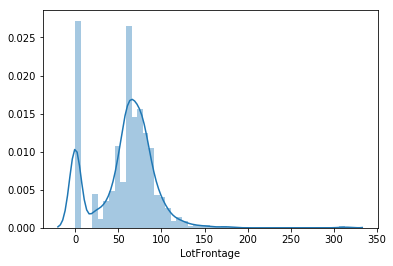

In [74]:
sns.distplot(train['LotFrontage'].fillna(0))

In [139]:
test[num_dis]=test[num_dis].fillna(0)
train[num_dis]=train[num_dis].fillna(0)
test[num_cont]=test[num_cont].fillna(0)
train[num_cont]=train[num_cont].fillna(0)

In [140]:
train.isnull().mean().sort_values(ascending=False).head(19)

PoolQC          0.995205
MiscFeature     0.963014
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
RoofStyle       0.000000
RoofMatl        0.000000
dtype: float64

For Bsmt and Garage the nan value may be due to a non existing facility

In [52]:
train.filter(regex=("^Garage*")).head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,1970-01-01 00:00:00.000002003,RFn,2,548,TA,TA
1,Attchd,1970-01-01 00:00:00.000001976,RFn,2,460,TA,TA
2,Attchd,1970-01-01 00:00:00.000002001,RFn,2,608,TA,TA


In [53]:
(train.filter(regex=("^Garage*"))).isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

In [54]:
(test.filter(regex=("^Garage*"))).isnull().sum()

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
dtype: int64

In [55]:
test.GarageCars.fillna(0, inplace=True)
test.GarageArea.fillna(0, inplace=True)

In [56]:
#Creation of a Dummy var for the presence of a garage
train['GarageIn']=pd.get_dummies(train.GarageYrBlt.isnull(), drop_first=True)
test['GarageIn']=pd.get_dummies(test.GarageYrBlt.isnull(), drop_first=True)

In [57]:
(train.filter(regex=("^Bsmt*"))).isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [58]:
(test.filter(regex=("^Bsmt*"))).isnull().sum()

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [59]:
#Creation of a Dummy var for the presence of a bsmt
train['BasementIn']=pd.get_dummies(train.BsmtQual.isnull(), drop_first=True)
test['BasementIn']=pd.get_dummies(test.BsmtQual.isnull(), drop_first=True)

### Let's Check for outliers ###

In [152]:
num_feat=num_cont+num_dis
num_feat.append("SalePrice")

In [157]:
num_corr=train[num_feat].corr()

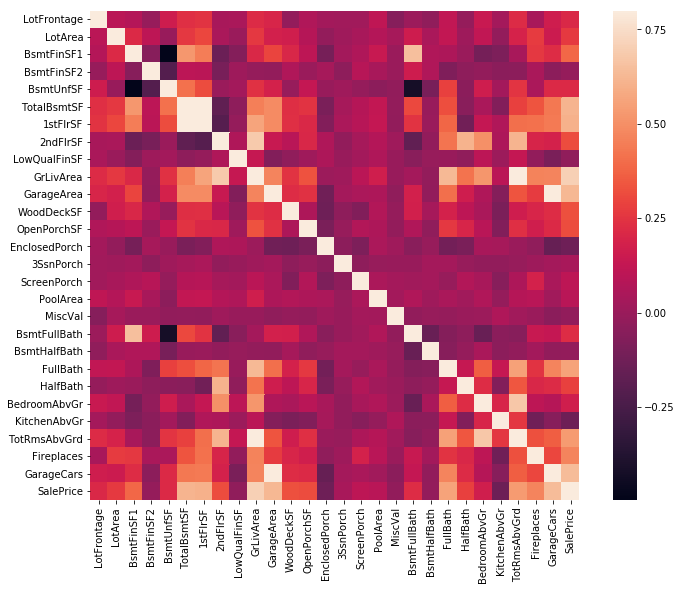

In [184]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(num_corr, square=True, vmax=0.8)

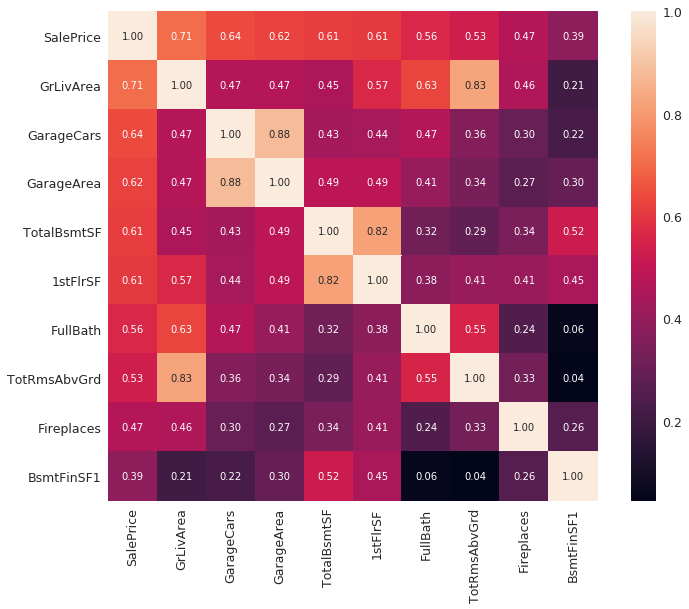

In [188]:
#saleprice correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
cols = num_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [195]:
num_corr=num_corr.SalePrice.sort_values(ascending=False)[1:8]
num_corr

GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [202]:
num_corr.index[0]

'GrLivArea'

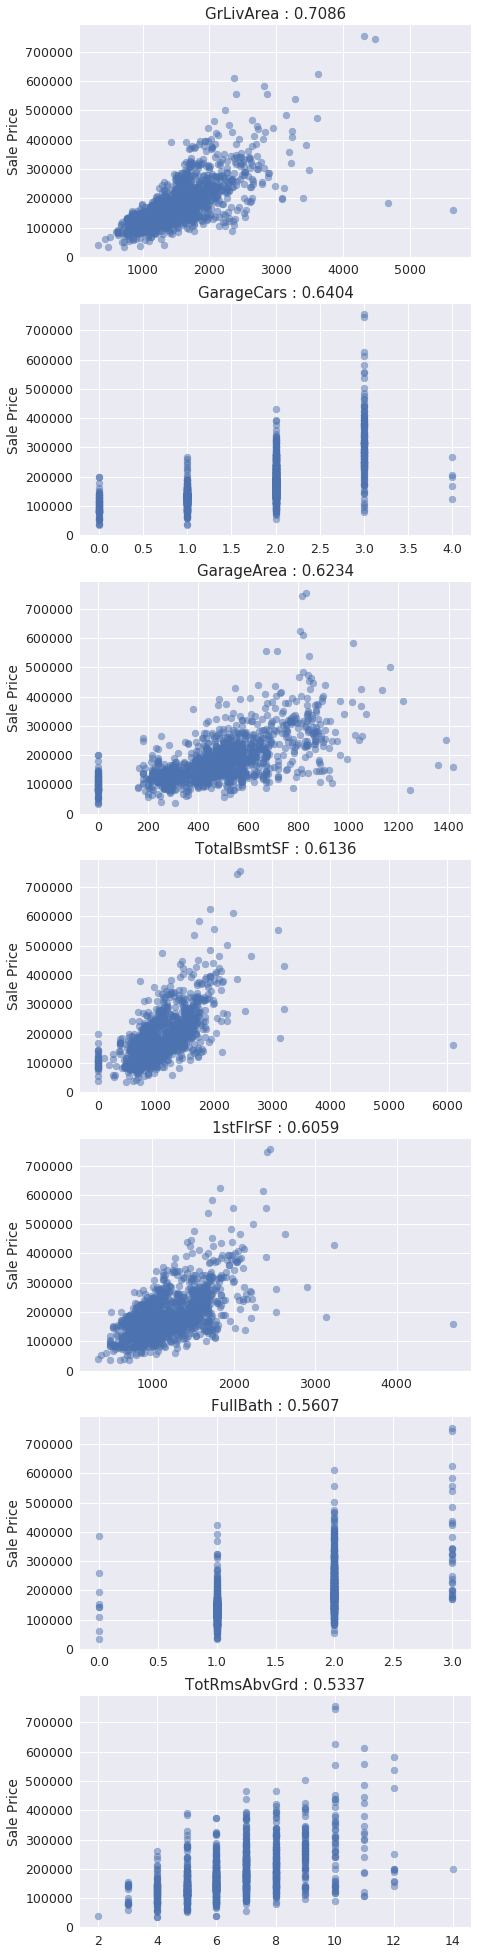

In [203]:
fig, ax = plt.subplots(nrows=len(num_corr),ncols=1, figsize=(7,5*len(num_corr)))

for i in range(len(num_corr)):
    ax[i].set_title(num_corr.index[i]+" : "+str(round(num_corr[i],4)))
    ax[i].scatter(y=train['SalePrice'],x=train[num_corr.index[i]], alpha=0.5)
    ax[i].set_ylabel('Sale Price')